In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

In [2]:
# Load the data
attrition_df = pd.read_csv("raw_data/HR-Employee-Attrition.csv")
attrition_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# Describe the data
attrition_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [4]:
attrition_df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [5]:
# Summarize the Data
employee_count = len(attrition_df)
attrition_rate = attrition_df.loc[attrition_df["Attrition"] == "Yes"]["Attrition"].count() / employee_count
gender_ratio_m = attrition_df.loc[attrition_df["Gender"] == "Male"]["Gender"].count() / employee_count
gender_ratio_f = attrition_df.loc[attrition_df["Gender"] == "Female"]["Gender"].count() / employee_count
avgyearswco = attrition_df["YearsAtCompany"].mean()
avgsatisfaction = attrition_df["JobSatisfaction"].mean()


summary_df = pd.DataFrame([{"Employee Count":employee_count,
                            "Attrition Rate":attrition_rate,
                            "Gender Ratio (Male)": gender_ratio_m,
                            "Gender Ratio (Female)": gender_ratio_f,
                            "Avg Years at Company": avgyearswco,
                            "Avg Job Satisfaction (out of 5)": avgsatisfaction
                           }])
summary_df

,Employee Count,Attrition Rate,Gender Ratio (Male),Gender Ratio (Female),Avg Years at Company,Avg Job Satisfaction (out of 5)
0,1470,0.161224,0.6,0.4,7.008163,2.728571


In [6]:
# Bin Age
bins = [0,25,35,45,55,99]
group_names = ["0-25","25-35","35-45","45-55","55+"]

In [7]:
# create a binned_df to keep the raw data untouched
binned_df = attrition_df.copy()
binned_df["Attrition Rate"] = ""
for index, row in binned_df.iterrows():
    if row["Attrition"] == "Yes":
        binned_df.loc[index,"Attrition Rate"] = 1
    else:
        binned_df.loc[index,"Attrition Rate"] = 0

# Bin by age
binned_df["Age Bins"] = pd.cut(attrition_df["Age"],
                                bins,labels = group_names,
                                include_lowest = True)

# Identify which columns we wanna group by
jobsat = binned_df.groupby("Age Bins")["JobSatisfaction"].mean()
attritionrate = binned_df.groupby("Age Bins")["Attrition Rate"].mean()

# create an age_bin summary
age_bin_summary = pd.DataFrame({
    "Job Satisfaction":jobsat,
    "Attrition Rate": attritionrate
})
age_bin_summary



,Job Satisfaction,Attrition Rate
Age Bins,,
0-25,2.731707,0.357724
25-35,2.739274,0.191419
35-45,2.730769,0.091880
45-55,2.703540,0.115044
55+,2.680851,0.170213


<Axes: ylabel='Department'>

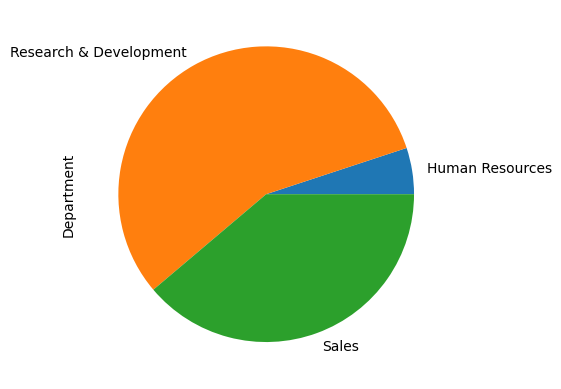

In [8]:
# Pie Chart - attrition by department
attrition_yes = attrition_df.loc[attrition_df["Attrition"] == "Yes"].groupby("Department")["Department"].count()

attrition_yes.plot.pie(y='Department')

<Axes: ylabel='Gender'>

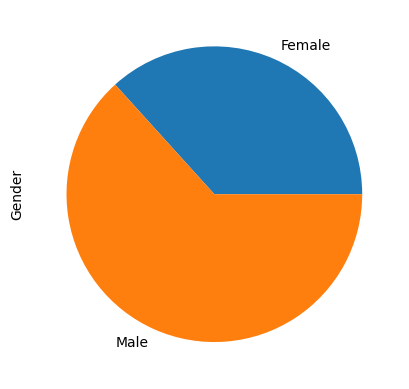

In [9]:
# Pie Chart - attrition by gender
attrition_gender = attrition_df.loc[attrition_df["Attrition"] == "Yes"].groupby("Gender")["Gender"].count()

attrition_gender.plot.pie(y='Gender')

The correlation between commute and time at the company is 0.01


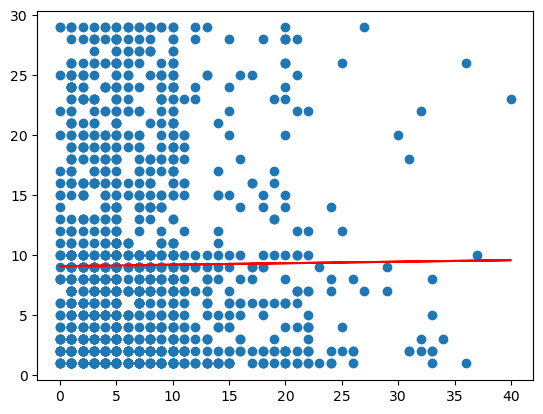

In [10]:
# Commute vs Time at the Company
# Correlation
correlation = st.pearsonr(attrition_df["YearsAtCompany"],attrition_df["DistanceFromHome"])
print(f"The correlation between commute and time at the company is {round(correlation[0],2)}")

# Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(attrition_df["YearsAtCompany"], attrition_df["DistanceFromHome"])
regress_values = attrition_df["YearsAtCompany"] * slope + intercept

# Plot
plt.scatter(attrition_df["YearsAtCompany"],attrition_df["DistanceFromHome"])
plt.plot(attrition_df["YearsAtCompany"],regress_values,"r-")
plt.show()

The correlation between age and monthly income is 0.5


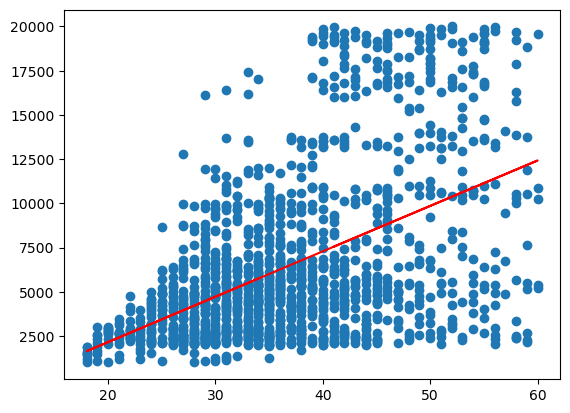

In [11]:
# Salary vs Age

# Correlation
correlation = st.pearsonr(attrition_df["Age"],attrition_df["MonthlyIncome"])
print(f"The correlation between age and monthly income is {round(correlation[0],2)}")

# Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(attrition_df["Age"], attrition_df["MonthlyIncome"])
regress_values = attrition_df["Age"] * slope + intercept

# Plot
plt.scatter(attrition_df["Age"],attrition_df["MonthlyIncome"])
plt.plot(attrition_df["Age"],regress_values,"r-")
plt.show()

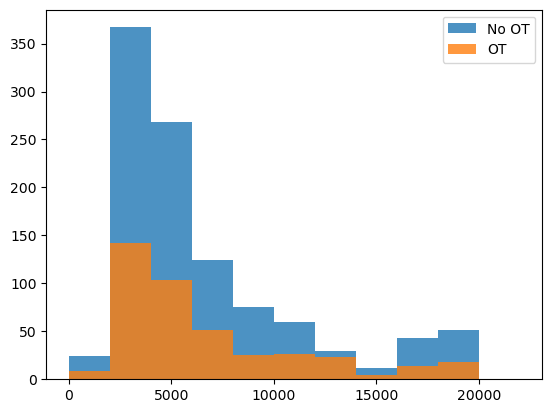

In [12]:
# Monthly Income vs OT
bins = [0,2000,4000,6000,8000,10000,12000,14000,16000,18000,20000,22000]

plt.hist(attrition_df.loc[(attrition_df["OverTime"]=="No")]["MonthlyIncome"],bins,alpha=0.8,label="No OT")
plt.hist(attrition_df.loc[(attrition_df["OverTime"]=="Yes")]["MonthlyIncome"],bins,alpha=0.8,label="OT")
plt.legend(loc='upper right')

plt.show()

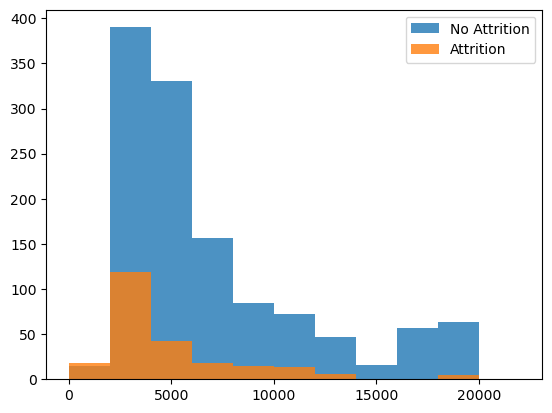

In [13]:
# Income vs Attrition ???

bins = [0,2000,4000,6000,8000,10000,12000,14000,16000,18000,20000,22000]

plt.hist(attrition_df.loc[(attrition_df["Attrition"]=="No")]["MonthlyIncome"],bins,alpha=0.8,label="No Attrition")
plt.hist(attrition_df.loc[(attrition_df["Attrition"]=="Yes")]["MonthlyIncome"],bins,alpha=0.8,label="Attrition")
plt.legend(loc='upper right')

plt.show()

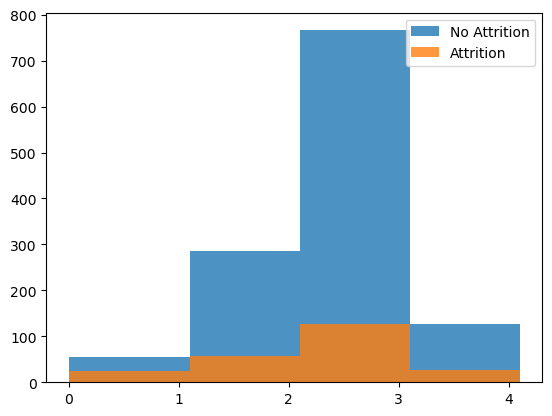

In [14]:
# Work-Life vs Attrition
bins = [0,1.1,2.1,3.1,4.1]

plt.hist(attrition_df.loc[(attrition_df["Attrition"]=="No")]["WorkLifeBalance"],bins,alpha=0.8,label="No Attrition")
plt.hist(attrition_df.loc[(attrition_df["Attrition"]=="Yes")]["WorkLifeBalance"],bins,alpha=0.8,label="Attrition")
plt.legend(loc='upper right')

plt.show()

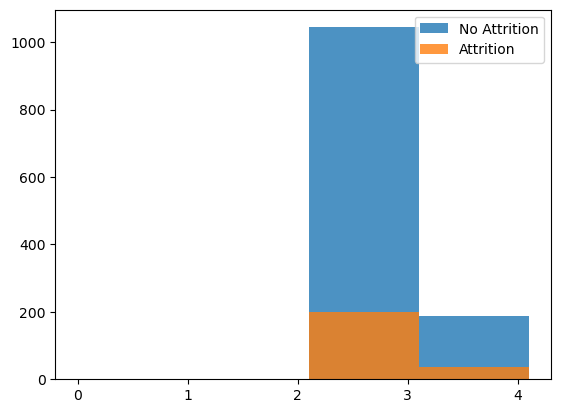

In [15]:
# Performance Rating vs Attrition

bins = [0,1.1,2.1,3.1,4.1]

plt.hist(attrition_df.loc[(attrition_df["Attrition"]=="No")]["PerformanceRating"],bins,alpha=0.8,label="No Attrition")
plt.hist(attrition_df.loc[(attrition_df["Attrition"]=="Yes")]["PerformanceRating"],bins,alpha=0.8,label="Attrition")
plt.legend(loc='upper right')

plt.show()

The correlation between years in current role and years since last promotion is 0.55


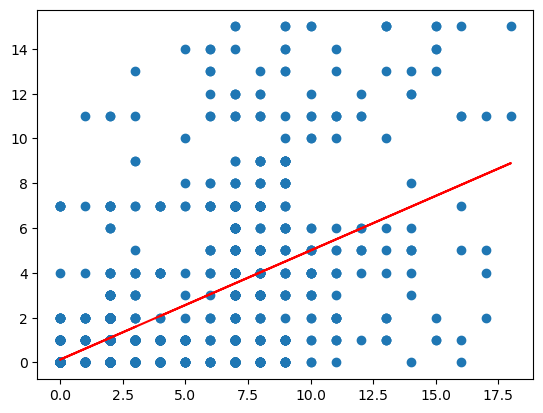

In [16]:
# Promotions over Time

# Correlation
correlation = st.pearsonr(attrition_df["YearsInCurrentRole"],attrition_df["YearsSinceLastPromotion"])
print(f"The correlation between years in current role and years since last promotion is {round(correlation[0],2)}")

# Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(attrition_df["YearsInCurrentRole"], attrition_df["YearsSinceLastPromotion"])
regress_values = attrition_df["YearsInCurrentRole"] * slope + intercept

# Plot
plt.scatter(attrition_df["YearsInCurrentRole"],attrition_df["YearsSinceLastPromotion"])
plt.plot(attrition_df["YearsInCurrentRole"],regress_values,"r-")
plt.show()